In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [21]:
#replace this with a interpolating table
def time_at_dist(x):
    return 0.2 * x

x_opt: 2.520687484769015, theta: -81.95215375268849, error: -3.9968028886505635e-14


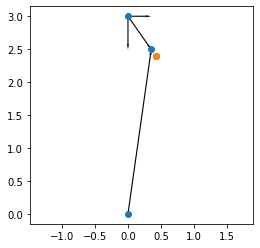

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis("equal")

R = 3 #distance to target as given by vision
vx = -1 #velocity of target in direction of robot (radial)
vz = 0.7 #velocity of target perpendicular to robot (tangential)

#function that is zero when a ball lands on a point x distance away from the robot
#and in that time the target has also moved to being x distance away
def objective(x): 
    return (R + vx * time_at_dist(x))**2 + (vz * time_at_dist(x))**2 - x**2

x_opt = fsolve(objective, x0 = R) #python library finds an x that meets above condition, could also use newtons method
x_opt = x_opt[0] #should only be one solution, take the first indexed solution
t = time_at_dist(x_opt) #this is time the ball spends in the air

theta = -np.arccos(vz * t / x_opt) #angle of the new goal with the original direction of target
print(f"x_opt: {x_opt}, theta: {np.degrees(theta)}, error: {objective(x_opt)}")


robot = np.array([0, 0])
hub = np.array([0, R])
target_pred = [x_opt*np.cos(-theta), x_opt*np.sin(-theta)] #target position relative to robot when the ball lands

t_simple = time_at_dist(R) #simpler method is just to use the initial vision distance to get time of flight
target_pred_simple = [vz*t_simple, R + vx*t_simple] #this estimate is different from target_pred if vx != 0 

robot_to_target_pred = [robot, target_pred]
robot_to_target_pred_simple = [robot, target_pred_simple]
hub_dx = [hub, t * np.array([0, vx])]
hub_dz = [hub, t * np.array([vz, 0])]
hub_moved = [hub, t * np.array([vz, vx])]

dots = np.array([target_pred, target_pred_simple, robot, hub])
arrows = np.array([robot_to_target_pred, hub_dx, hub_dz, hub_moved])

plt.quiver(arrows[:,0,0], arrows[:,0,1], arrows[:,1,0], arrows[:,1,1],
        angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2)
plt.scatter(dots[:, 0], dots[:, 1])
plt.scatter(target_pred_simple[0], target_pred_simple[1])

#orange dot is the target prediction using initial vision distance to get time
